In [1]:
import sys, os
import xsimlab as xs
import xarray as xa
import pandas as pd
import numpy as np
import sparse

sys.path.insert(0, os.path.join(os.getcwd(), '..'))
import vmlab

In [2]:
from vmlab.models import fruit_model
from vmlab.processes import carbon_unit

fruit_model = fruit_model.update_processes({ 'carbon_unit': carbon_unit.JustOne })
fruit_model

<xsimlab.Model (12 processes, 6 inputs)>
params
    path              [in]
    seed              [in]
env
topo
    adjacency      [inout] ('GU', 'GU') 
    nb_leaves_gu   [inout] ('GU',) 
pheno
    bloom_date     [inout] ('GU',) bloom date
fruit_growth
    nb_fruits_ini  [inout] ('GU',) 
inflo_growth
gu_growth
carbon_unit
light
photo
carbon
fruit_quality

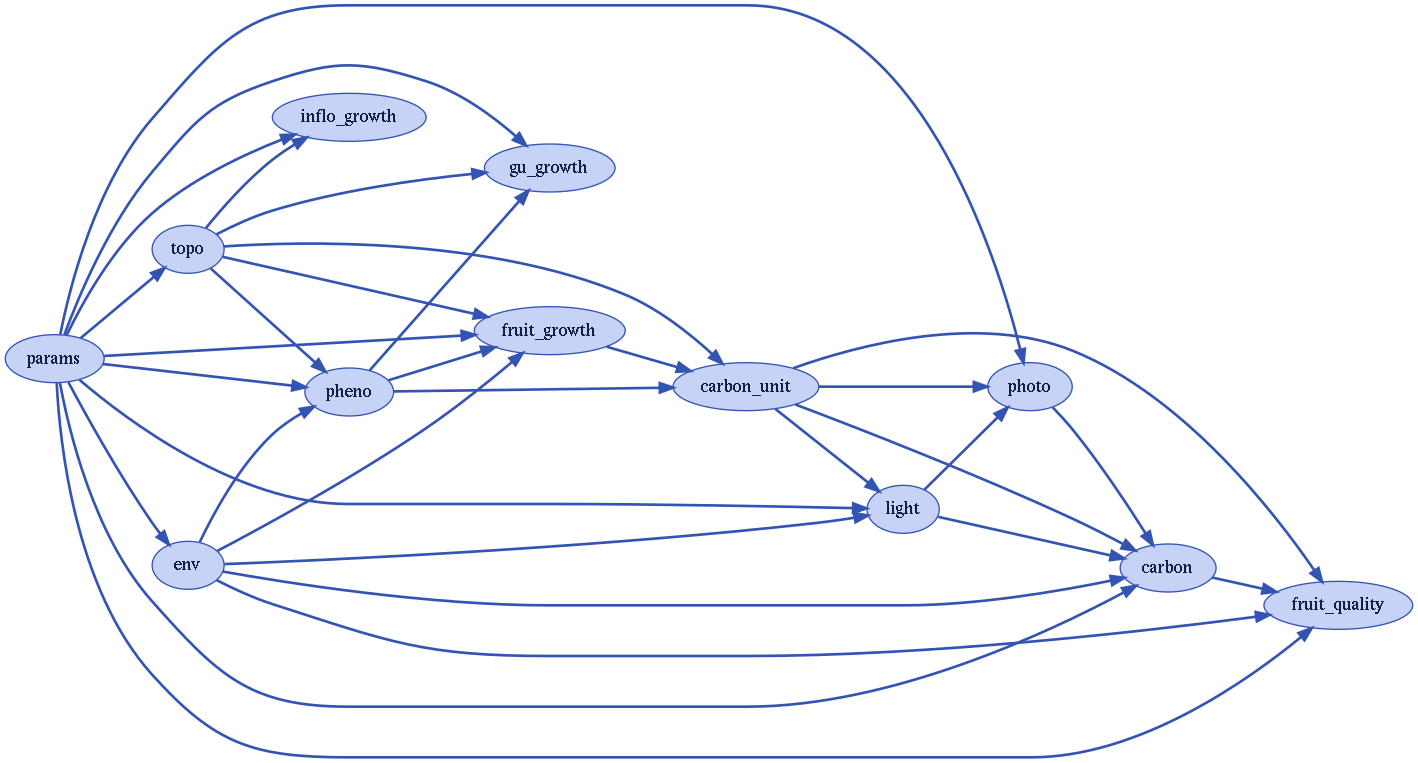

In [3]:
fruit_model.visualize(show_inputs=False, show_variables=False)

In [4]:
ds = vmlab.create_setup(
    model=fruit_model,
    clocks={
        'day': pd.date_range(start='2002-09-02', end='2003-03-28', freq="1d")
    },
    master_clock='day',
    input_vars={
        'params': {
            'seed': 0,
            'path': '../share/setup/default.toml'
        },
        'pheno': { 
            'bloom_date': [
                '2001-11-01',
                '2002-11-01',
                '2002-11-10',
                '2002-11-20',
                '2002-11-30',
                '2002-12-10',
                '2002-12-20',
            ]
        },
        'topo': {
            'adjacency': sparse.COO(np.array([
                    [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6]
                ]).transpose(), True, shape=(7, 7)),
            'nb_leaves_gu': [0, 5, 10, 25, 50, 100, 150]
        },
        'fruit_growth': {
            'nb_fruits_ini': [0, 1, 1, 1, 1, 1, 1]
        }
    }
)

In [5]:
ds

Format,coo
Data Type,bool
Shape,"(7, 7)"
nnz,6
Density,0.12244897959183673
Read-only,True
Size,102
Storage ratio,2.1


In [6]:
ds_out = ds.xsimlab.run(model=fruit_model, decoding={ 'mask_and_scale': False }, validate='all')

In [7]:
ds_out

<xarray.Dataset>
Dimensions:                                (CU: 1, GU: 7, day: 208, hour: 24)
Coordinates:
  * CU                                     (CU) <U20 'CU_One_And_Only'
  * GU                                     (GU) <U10 'GU0' 'GU1' ... 'GU5' 'GU6'
  * day                                    (day) datetime64[ns] 2002-09-02 .....
  * hour                                   (hour) int8 0 1 2 3 4 ... 20 21 22 23
Data variables:
    carbon__DM_fruit                       (day, CU) float64 0.0 0.0 ... 229.5
    carbon__DM_fruit_delta                 (day, CU) float64 0.0 0.0 ... 1.526
    carbon__DM_structural_leaf             (day, CU) float64 0.0 0.0 ... 41.98
    carbon__DM_structural_stem             (day, CU) float64 53.66 ... 53.66
    carbon__D_fruit                        (day, CU) float64 0.0 0.0 ... 6.527
    carbon__MR_fruit                       (day, CU) float64 0.0 0.0 ... 0.3553
    carbon__MR_leaf                        (day, CU) float64 0.0 0.0 ... 0.1223
    carbon__MR_repro                       (day, CU) float64 0.0 0.0 ... 0.3553
    carbon__MR_stem                        (day, CU) float64 0.0 0.0 ... 0.06543
    carbon__MR_veget                       (day, CU) float64 0.0 0.0 ... 0.1877
    carbon__assimilates                    (day, CU) float64 0.04289 ... 1.251
    carbon__remains_1                      (day, CU) float64 0.04289 ... 1.063
    carbon__remains_2                      (day, CU) float64 0.04289 ... 0.7079
    carbon__remains_3                      (day, CU) float64 0.04289 ... 0.0
    carbon__required_DM_fruit              (day, CU) float64 0.0 0.0 ... 0.0 0.0
    carbon__reserve_leaf                   (day, CU) float64 0.0 0.0 ... 0.0 0.0
    carbon__reserve_leaf_max               (day, CU) float64 0.0 0.0 ... 0.0 0.0
    carbon__reserve_mob                    (day, CU) float64 0.04289 ... 0.00...
    carbon__reserve_nmob_leaf              (day, CU) float64 0.0 0.0 ... 0.0 0.0
    carbon__reserve_nmob_stem              (day, CU) float64 2.573 ... 0.5905
    carbon__reserve_stem                   (day, CU) float64 2.616 ... 0.5905
    carbon_unit__CUxGU                     (day, CU, GU) float64 1.0 1.0 ... 1.0
    carbon_unit__DM_fruit_0                (day, CU) float64 0.0 0.0 ... 21.38
    carbon_unit__DM_fruit_max              (day, CU) float64 0.0 0.0 ... 678.8
    carbon_unit__dd_cum                    (day, CU) float64 0.0 ... 1.224e+03
    carbon_unit__dd_delta                  (day, CU) float64 0.0 0.0 ... 8.85
    carbon_unit__nb_fruits                 (day, CU) float64 0.0 0.0 ... 6.0 6.0
    carbon_unit__nb_leaves                 (day, CU) float64 340.0 ... 340.0
    env__GR                                (day, hour) float64 0.0 0.0 ... 0.0
    env__RH                                (day, hour) float64 76.0 ... 78.0
    env__TM                                (day) float64 21.6 20.9 ... 24.85
    env__TM_air                            (day, hour) float64 20.7 ... 24.85
    env__T_air                             (day, hour) float64 17.1 ... 21.3
    env__T_fruit                           (day, hour) float64 17.1 ... 21.3
    fruit_growth__DM_fruit_0_gu            (day, GU) float64 21.38 ... 21.38
    fruit_growth__DM_fruit_max_gu          (day, GU) float64 0.0 0.0 ... 113.1
    fruit_growth__nb_fruits_gu             (day, GU) float64 0.0 0.0 ... 1.0 1.0
    fruit_growth__nb_fruits_ini            (day, GU) int64 0 1 1 1 1 ... 1 1 1 1
    fruit_quality__DM_flesh                (day, CU) float64 0.0 0.0 ... 156.7
    fruit_quality__DM_fleshpeel            (day, CU) float64 0.0 0.0 ... 190.5
    fruit_quality__FM_fruit                (day, CU) float64 0.0 0.0 ... 734.2
    fruit_quality__W_flesh                 (day, CU) float64 0.0 0.0 ... 418.2
    fruit_quality__W_fleshpeel             (day, CU) float64 0.0 0.0 ... 466.9
    fruit_quality__flux_xylem_phloem       (day, CU) float64 -0.0 -0.0 ... 12.56
    fruit_quality__fructose                (day, CU) float64 0.0 ... 1.508e-05


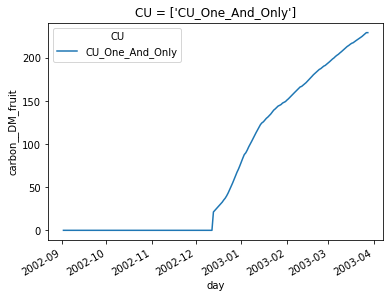

In [8]:
ds_out.carbon__DM_fruit.plot.line(x='day')

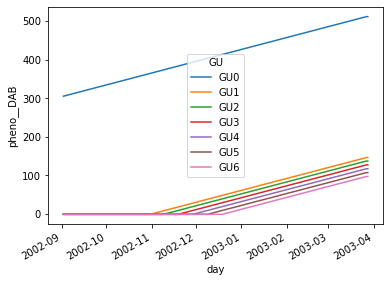

In [9]:
ds_out.pheno__DAB.plot.line(x='day')

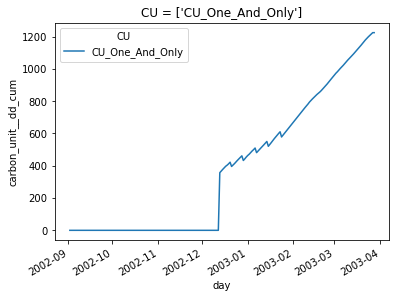

In [10]:
ds_out.carbon_unit__dd_cum.plot.line(x='day')

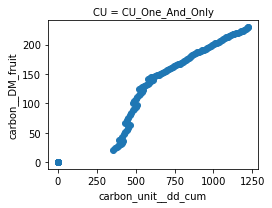

In [11]:
ds_out.plot.scatter(x='carbon_unit__dd_cum', y='carbon__DM_fruit', col='CU', col_wrap=3)

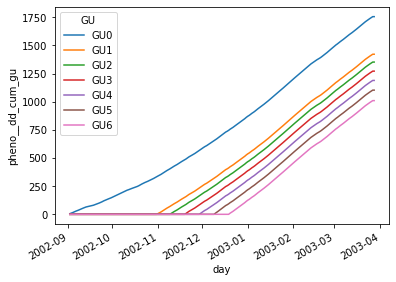

In [12]:
ds_out.pheno__dd_cum_gu.plot.line(x='day')

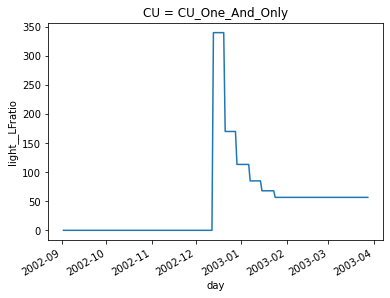

In [13]:
ds_out.light__LFratio.plot()

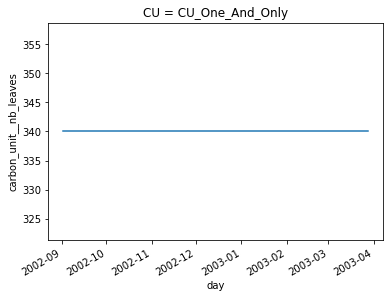

In [14]:
ds_out.carbon_unit__nb_leaves.plot()

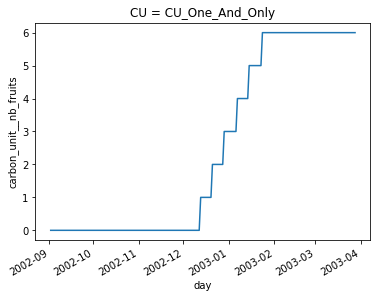

In [15]:
ds_out.carbon_unit__nb_fruits.plot()

